In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import bartlett, distributions, shapiro, ttest_ind, permutation_test

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## Ex 1

In [2]:
data = pd.read_csv('ds_salaries.csv')
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [3]:
used_data = data[['salary_in_usd', 'experience_level', 'remote_ratio']]
used_data

,salary_in_usd,experience_level,remote_ratio
0,79833,MI,0
1,260000,SE,0
2,109024,SE,50
3,20000,MI,0
4,150000,SE,50
...,...,...,...
602,154000,SE,100
603,126000,SE,100
604,129000,SE,0
605,150000,SE,100


In [4]:
used_data.isna().sum()

salary_in_usd       0
experience_level    0
remote_ratio        0
dtype: int64

(array([127.,   0.,   0.,   0.,   0.,  99.,   0.,   0.,   0., 381.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

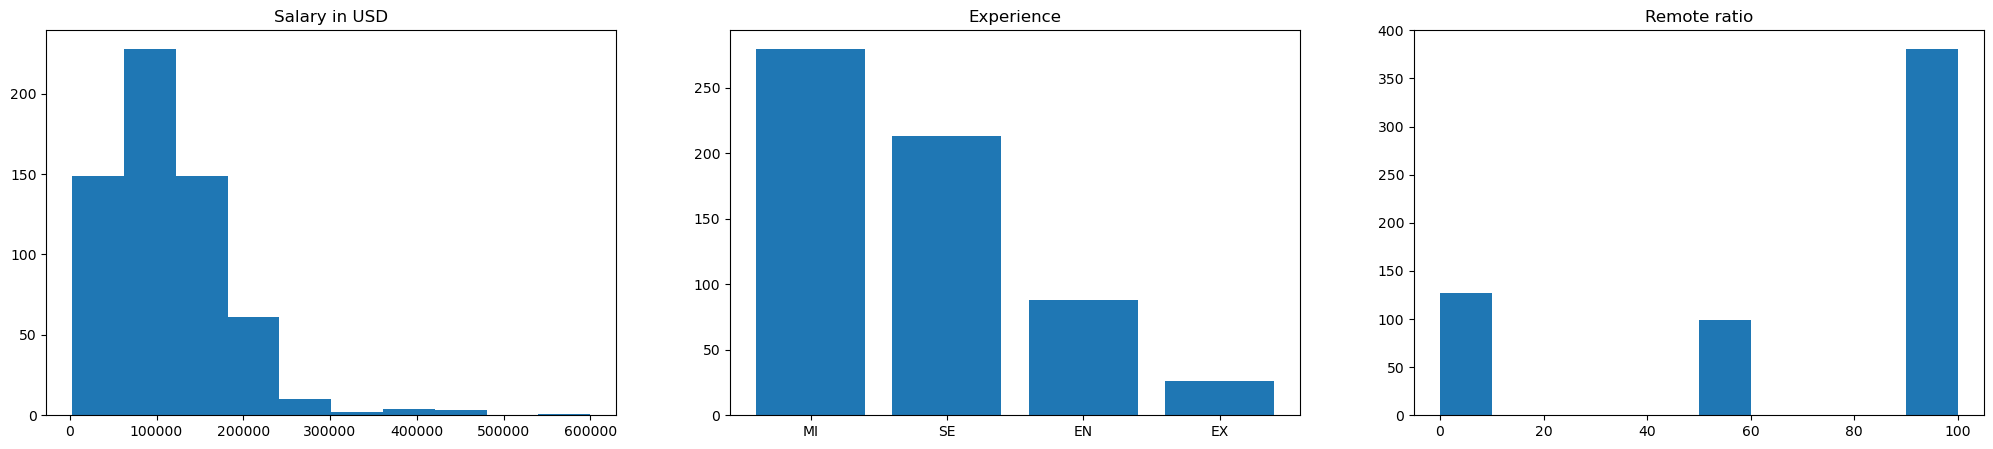

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5)) 

plt.subplot(1, 3, 1)
plt.title("Salary in USD") 
plt.hist(used_data['salary_in_usd'])

plt.subplot(1, 3, 2) 
plt.title("Experience") 
plt.bar(used_data['experience_level'].unique(), used_data['experience_level'].value_counts())

plt.subplot(1, 3, 3)
plt.title("Remote ratio") 
plt.hist(used_data['remote_ratio'])

In [6]:
used_data['Experience'] = used_data['experience_level'].apply(lambda x: 0 if x in ('EN', 'MI') else 1)
used_data['Remote'] = used_data['remote_ratio'].apply(lambda x: 0 if x == 0 else (1 if x == 50 else 2))

used_data

/var/folders/bb/sgc20cyj6z1_05b8x3_hjb540000gn/T/ipykernel_35979/3493455979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['Experience'] = used_data['experience_level'].apply(lambda x: 0 if x in ('EN', 'MI') else 1)
/var/folders/bb/sgc20cyj6z1_05b8x3_hjb540000gn/T/ipykernel_35979/3493455979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['Remote'] = used_data['remote_ratio'].apply(lambda x: 0 if x == 0 else (1 if x == 50 else 2))


,salary_in_usd,experience_level,remote_ratio,Experience,Remote
0,79833,MI,0,0,0
1,260000,SE,0,1,0
2,109024,SE,50,1,1
3,20000,MI,0,0,0
4,150000,SE,50,1,1
...,...,...,...,...,...
602,154000,SE,100,1,2
603,126000,SE,100,1,2
604,129000,SE,0,1,0
605,150000,SE,100,1,2


In [7]:
sample1 = used_data[(used_data['Experience'] == 0) & (used_data['Remote'] == 0)].sample(n=32, random_state=7)
sample2 = used_data[(used_data['Experience'] == 0) & (used_data['Remote'] == 1)].sample(n=32, random_state=7)
sample3 = used_data[(used_data['Experience'] == 0) & (used_data['Remote'] == 2)].sample(n=32, random_state=7)
sample4 = used_data[(used_data['Experience'] == 1) & (used_data['Remote'] == 0)].sample(n=32, random_state=7)
sample5 = used_data[(used_data['Experience'] == 1) & (used_data['Remote'] == 1)].sample(n=32, random_state=7)
sample6 = used_data[(used_data['Experience'] == 1) & (used_data['Remote'] == 2)].sample(n=32, random_state=7)


In [8]:
salaries = [sample1["salary_in_usd"], sample2["salary_in_usd"], sample3["salary_in_usd"], sample4["salary_in_usd"], sample5["salary_in_usd"], sample6["salary_in_usd"]]

In [9]:
stat, pvalue = bartlett(*salaries)
print(stat, pvalue)

17.696828007276025 0.003351375078910466


In [10]:
r = len(salaries)
n = 0
N = np.empty(r)

for i in range(r):
    N[i] = len(salaries[i])
    n += N[i]

Si_2 = np.empty(r)
S_2 = 0

for i in range(r):
    xi_bar = np.mean(salaries[i])
    Si_2[i] = np.sum((salaries[i] - xi_bar)**2) / (N[i] - 1)
    S_2 += (N[i]-1) * Si_2[i]
    
S_2 = S_2 / (n - r)
                                   
numarator = (n*1 - r) * np.log(S_2) - np.sum(((N - 1)*np.log(Si_2)))
numitor = 1 + 1/(3*(r - 1)) * ((np.sum(1/(N - 1))) - 1/(n - r))

k_2 = numarator / numitor
pval = distributions.chi2.sf(k_2, r-1) 
print(k_2, pval)

17.696828007276025 0.003351375078910466


In [11]:
sampled_data = [sample1, sample2, sample3, sample4, sample5, sample6]
sampled_data = pd.concat(sampled_data, ignore_index=True)

In [13]:
model = ols('salary_in_usd ~ Experience * Remote', data=sampled_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Experience,2.132797e+11,1.0,59.080065,8.167342e-13
Remote,2.263317e+10,1.0,6.269555,1.313418e-02
Experience:Remote,8.946609e+08,1.0,0.247828,6.191907e-01
Residual,6.786822e+11,188.0,NaN,NaN


In [109]:
first_group = used_data[used_data['experience_level'] == 'EN']['salary_in_usd']
second_group = used_data[used_data['experience_level'] == 'MI']['salary_in_usd']

In [110]:
shapiro_stat_1, shapiro_p_value_1 = shapiro(first_group)
print(shapiro_stat_1, shapiro_p_value_1)
shapiro_stat_2, shapiro_p_value_2 = shapiro(second_group)
print(shapiro_stat_2, shapiro_p_value_2)

0.8898187875747681 1.8308555809198879e-06
0.796779990196228 6.142671816180753e-16


In [111]:
t_stat, t_p_value = ttest_ind(first_group, second_group)
print(t_stat, t_p_value)

-3.530936450656235 0.0004793707388308705


In [118]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

res = permutation_test((first_group, second_group), statistic, n_resamples=1000, vectorized=True, alternative='less')
print(res.pvalue)

0.000999000999000999


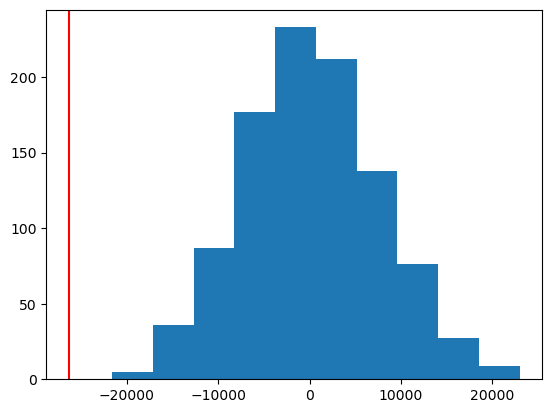

In [131]:
plt.hist(res.null_distribution)
plt.axvline(statistic(first_group, second_group, 0), color='red')
plt.show()

## Ex 2

In [83]:
data=pd.read_csv('advertising.csv')

print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [84]:
y = data['Sales']
X = data.drop('Sales',axis=1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)

In [86]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)

In [87]:
r2_score(y_test, predictions)

0.9143264102041112

In [88]:
residuals = y_test - predictions
stat, p_value = shapiro(residuals)
print(stat, p_value)

0.9700169563293457 0.36035823822021484


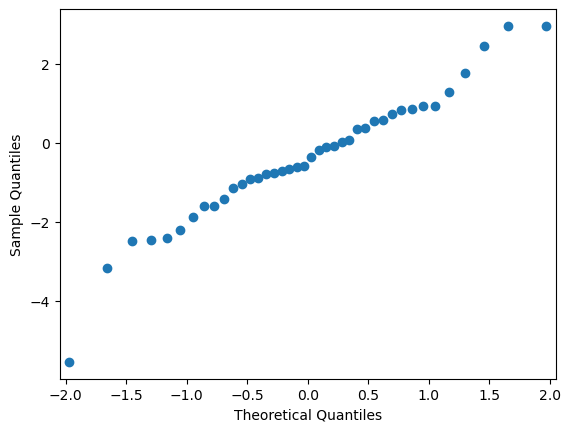

In [89]:
fig = sm.qqplot(residuals)
plt.show()

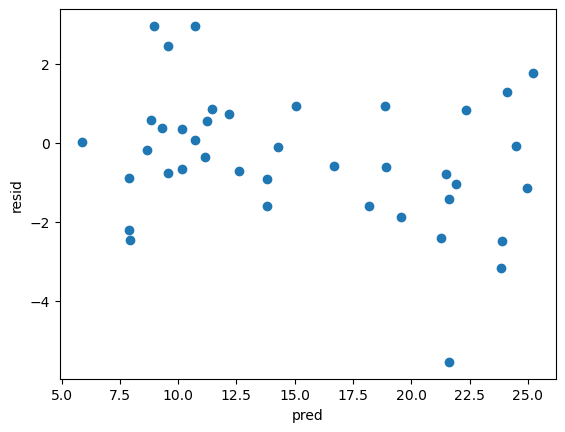

In [90]:
plt.scatter(predictions, residuals)
plt.xlabel('pred')
plt.ylabel('resid')
plt.show()

In [91]:
model_sm = sm.formula.ols('y ~ TV + Radio + Newspaper', data=data)
results = model_sm.fit()
print(results.summary())
print(sm.stats.anova_lm(results))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           8.13e-99
Time:                        16:22:05   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

In [92]:
stat, p_value = shapiro(results.resid)
print(stat, p_value)

0.9758140444755554 0.0015761888353154063


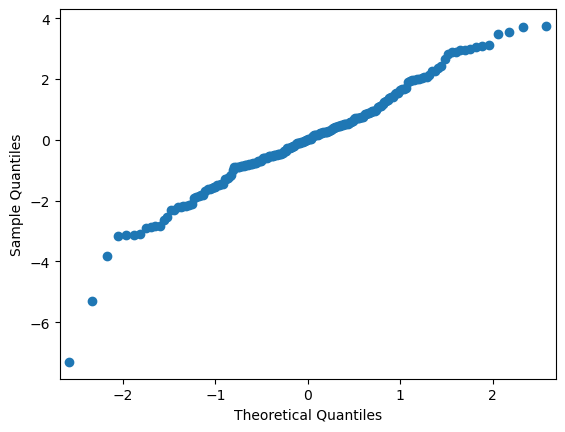

In [93]:
fig = sm.qqplot(results.resid)
plt.show()

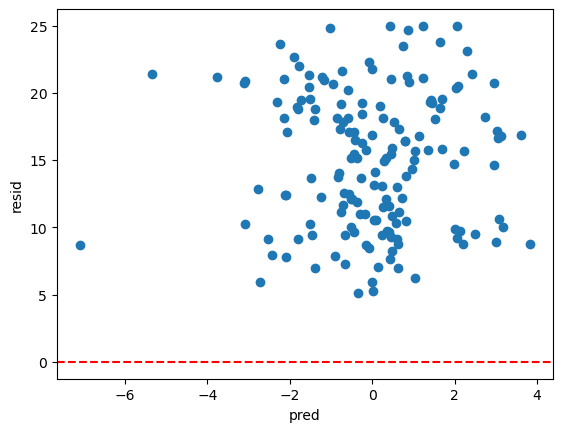

In [74]:
plt.scatter(results.resid, results.fittedvalues)
plt.xlabel('pred')
plt.ylabel('resid')
plt.show()